In [1]:
import sys
sys.path.append('../../')
import krylov.utils.loader as loader
import krylov.preconditioning
from krylov.methods import Methods

In [2]:
# length = int(sys.argv[1])
length = 1081
version = 'EFG'
directory = 'data'

In [3]:
A = loader.matrixLoader(directory,version,length)
b = loader.vectorLoader(directory,version,length)

In [4]:
k = 8

In [16]:
for k in range(1,10):
#     kskipmrr = Methods(A,b)
#     kskipmrr.kskipmrr(k=k)
    adaptivekskipmrr = Methods(A,b)
    adaptivekskipmrr.adaptivekskipmrr(k=k)
    variable = Methods(A,b)
    variable.variablekskipmrr(k=k)
#     Methods.multiplot([kskipmrr,adaptivekskipmrr],figsize=(12,8))
    Methods.multiplot([variable,adaptivekskipmrr],figsize=(12,8))    

--------------------
name:adaptive k-skip MrR
Status: converged
iter: 778 times
initial_k: 1
final_k: 1
residual: 9.600606770622823e-11
time: 0.8445639610290527
--------------------
--------------------
name:variable k-skip MrR


AttributeError: 'Methods' object has no attribute 'ks'

In [6]:
kskipmrr.output('kskip.json')
adaptivekskipmrr.output('adaptive.json')

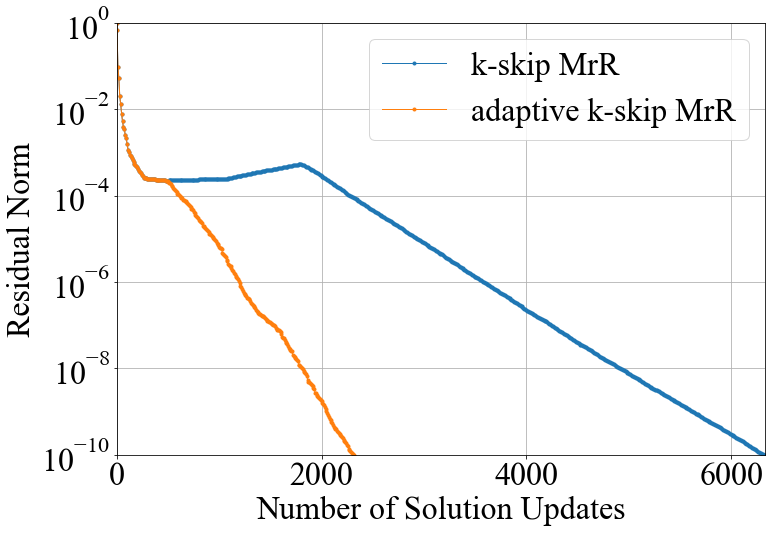

In [7]:
kskipjson = Methods(A,b)
adaptivejson = Methods(A,b)
kskipjson.json2instance('kskip.json')
adaptivejson.json2instance('adaptive.json')
Methods.multiplot([kskipmrr,adaptivekskipmrr],figsize=(12,8))